Piotr Włostek 
396443
projekt 1

In [174]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from functools import wraps
from time import time


In [175]:
def timeit100(f):
    @wraps(f)
    def wrap(*args, **kwargs):
        ts = time()
        for _ in range(100):
            f(*args, **kwargs)
        te = time()
        print(f'{f.__name__}: {(te-ts)/100:08.10f}s')
        return f(*args, **kwargs)
    return wrap

In [176]:
random_state = 254493
n_samples = 2593

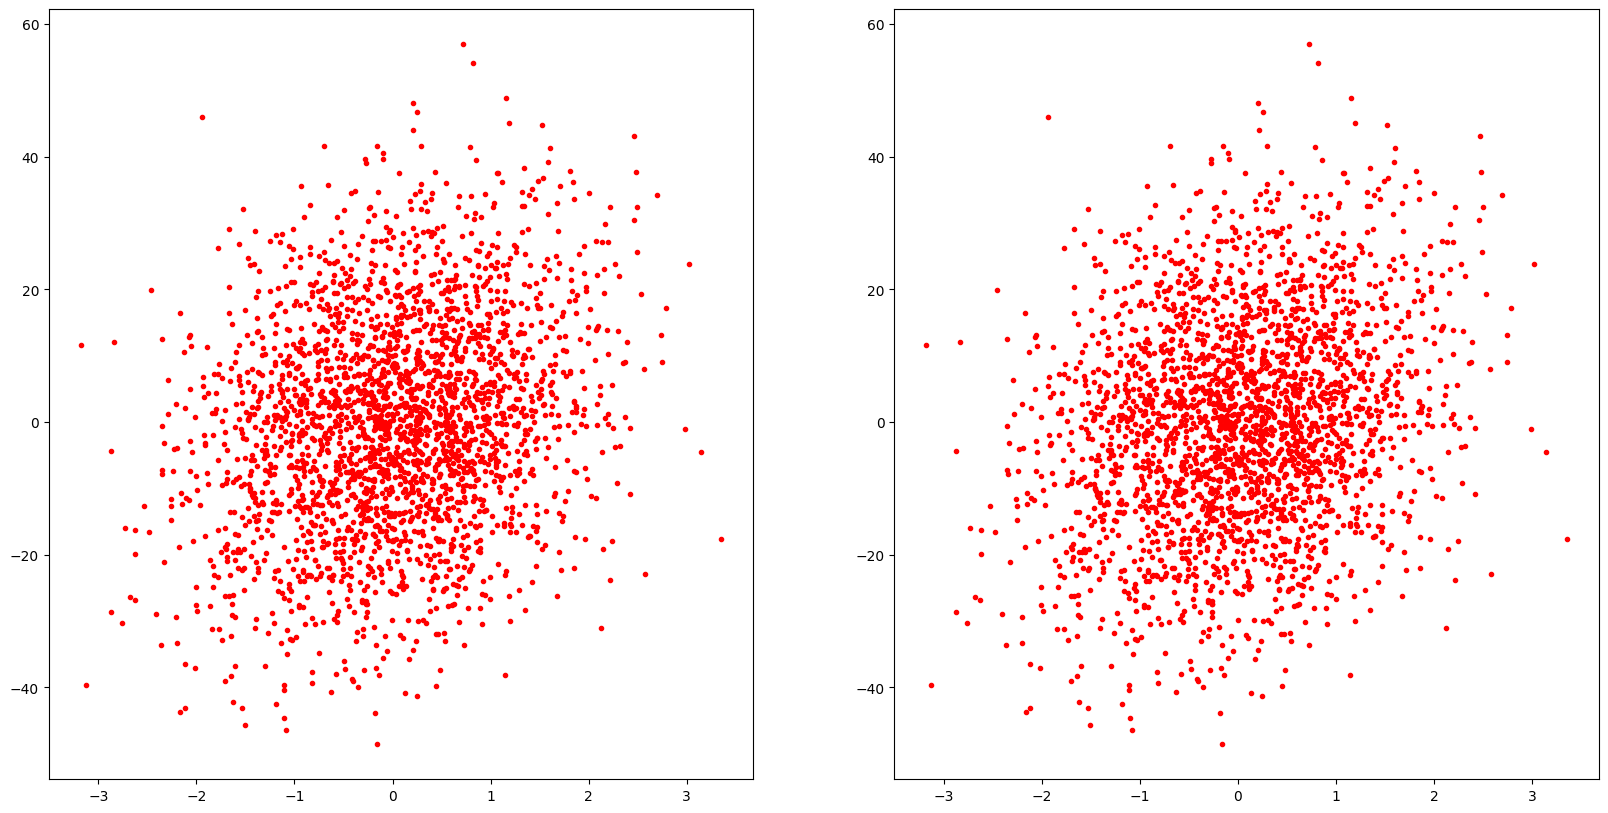

In [177]:
X, y = make_regression(random_state=random_state, n_samples=n_samples, noise=16, n_features=1)
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10))
ax1.plot(X, y, 'r.')
ax2.plot(X, y, 'r.')

Wersja numeryczna

In [178]:
#                          a   b
theta_initial = np.array([14, 2])


def get_loss_from_theta(theta):
    y_pred = X * theta[0] + theta[1]
    return mean_squared_error(y, y_pred)

@timeit100
def get_res():
    return minimize(get_loss_from_theta, theta_initial, method='Powell')
    
res = get_res()
theta_numeric = res.x

y_pred = X * theta_numeric[0] + theta_numeric[1]

numeric_mse = get_loss_from_theta(theta_numeric)
ax1.text(-3,55,f'Numeric MSE: {numeric_mse:.10f}',fontsize=20)
ax1.plot(X, y_pred)

get_res: 0.0148939896s


Wersja analityczna

In [179]:
def ypred(X, poly_degree, theta):
    y = 0
    for i in range(poly_degree+1):
        y += (X**(poly_degree-i))*theta[i]
    return y

In [180]:
X_n = np.vander(X.reshape(-1,), N=2)
theta_analytic = np.linalg.inv(X_n.T @ X_n) @ X_n.T @ y

y_pred = ypred(X, 1,theta_analytic)
analytic_mse = get_loss_from_theta(theta_analytic)

ax2.text(-3,55,f'Analytic MSE: {analytic_mse:.10f}',fontsize=20)
ax2.plot(X, y_pred)

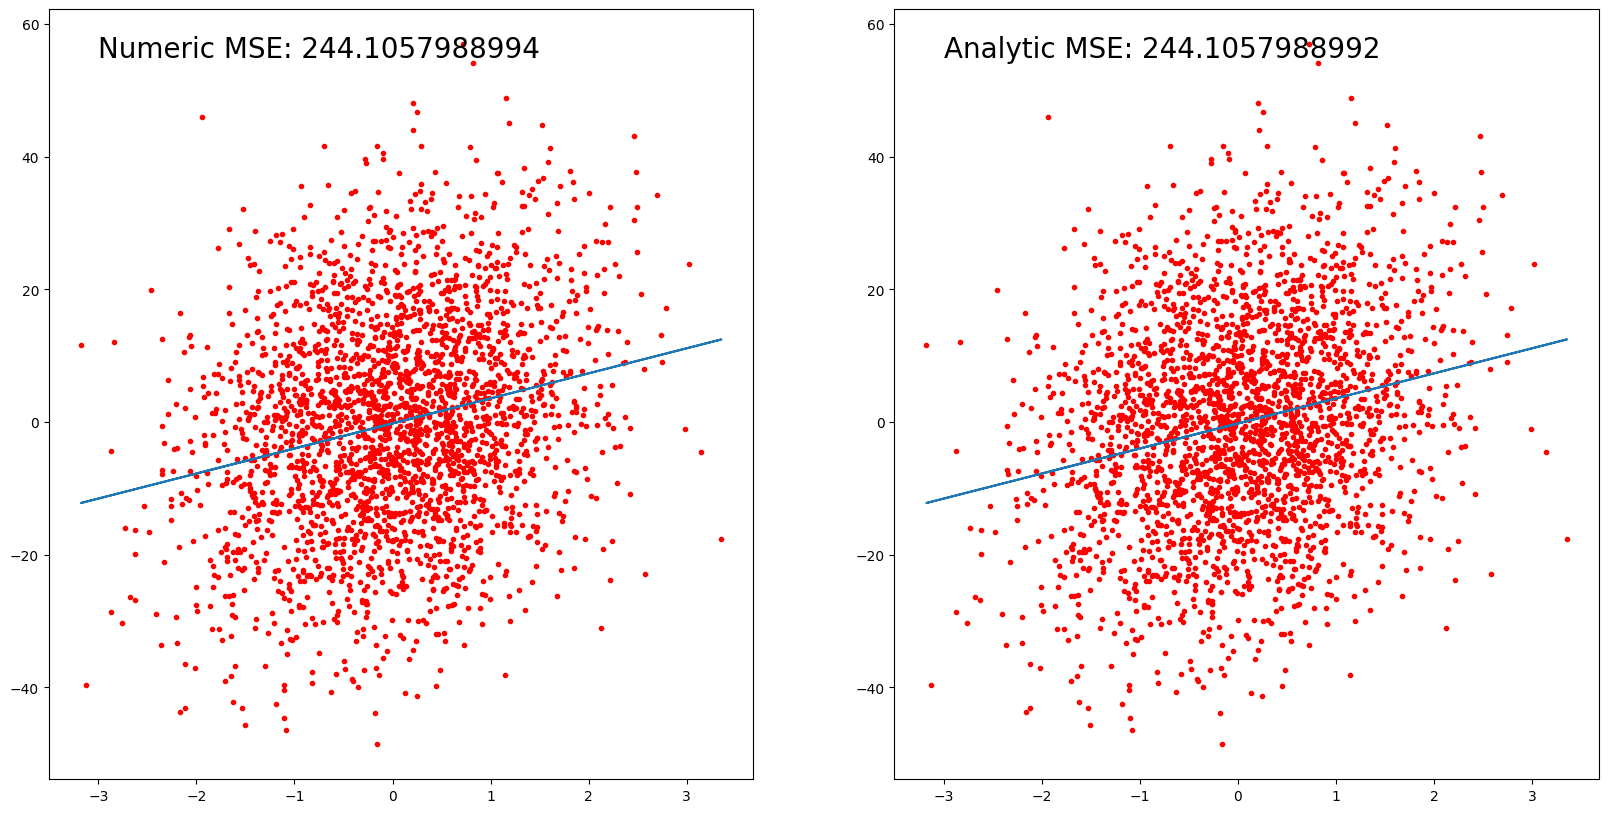

In [181]:
fig

FlapPy Bird. Przypadek minimalnego zbioru punktów.

In [182]:
data = np.genfromtxt('flappy_bird_case1.csv', delimiter=',')

In [183]:
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])

In [184]:
@timeit100
def analytic_method(x, y, poly_degree, ax, case, alpha = 1, linewidth = 3):
    Xn = np.vander(x.reshape(-1,), N= poly_degree +1)
    theta_analytic = np.linalg.inv(Xn.T @ Xn) @ Xn.T @ y
    y_pred = ypred(x, poly_degree, theta_analytic)
    

    MSE = mean_squared_error(y, y_pred)

    X = np.array([i/1000 for i in range(0,1001)])
    Y = ypred(X, poly_degree, theta_analytic)


    ax.scatter(x, y, color='cyan', alpha = alpha)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.text(0.1,0,f'Analytic: MSE = {MSE:.10f}',fontsize=20)
    ax.text(0.1,0.1,f'Polynomial degree: {poly_degree}',fontsize=20)
    ax.text(0.1,0.2,f'Case: {case}',fontsize=20)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.2)
    ax.plot(X, Y, color='blue', linewidth = linewidth )
    ax.grid(True)

In [185]:
@timeit100
def sklearn_method(x, y, poly_degree, ax, case, alpha = 1, linewidth = 3):
    poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
    x_poly = poly_features.fit_transform(x.reshape(-1,1))

    model = LinearRegression()
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    MSE = mean_squared_error(y, y_pred)

    X = np.array([[i / 1000] for i in range(1001)])  
    Y = model.predict(poly_features.transform(X)) 

    ax.scatter(x, y, color=(0.7, 0.9, 0.2), alpha=alpha)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.text(0.1,0,f'Sklearn: MSE = {MSE:.10f}',fontsize=20)
    ax.text(0.1,0.1,f'Polynomial degree: {poly_degree}',fontsize=20)
    ax.text(0.1,0.2,f'Case: {case}',fontsize=20)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.2)
    ax.plot(X, Y, color='green', linewidth = linewidth )
    ax.grid(True)


sklearn_method: 0.0058938956s
sklearn_method: 0.0059001184s
analytic_method: 0.0057476115s
analytic_method: 0.0061143661s


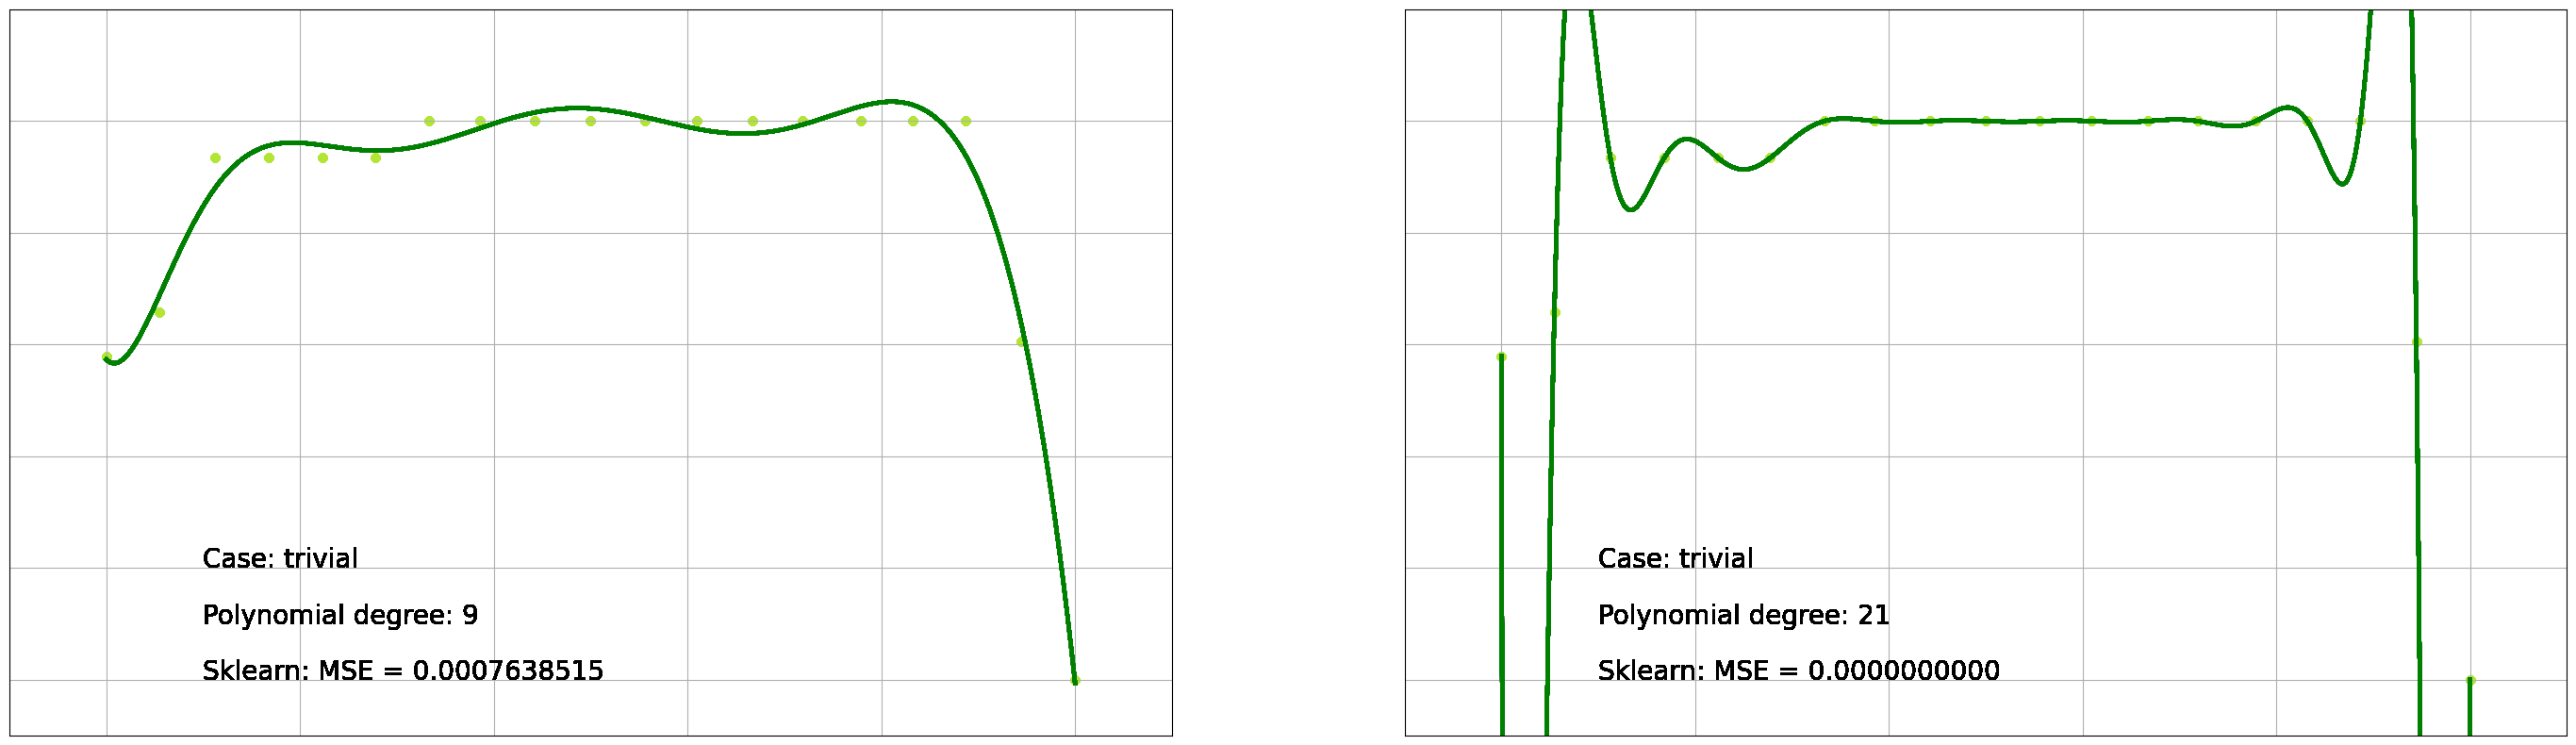

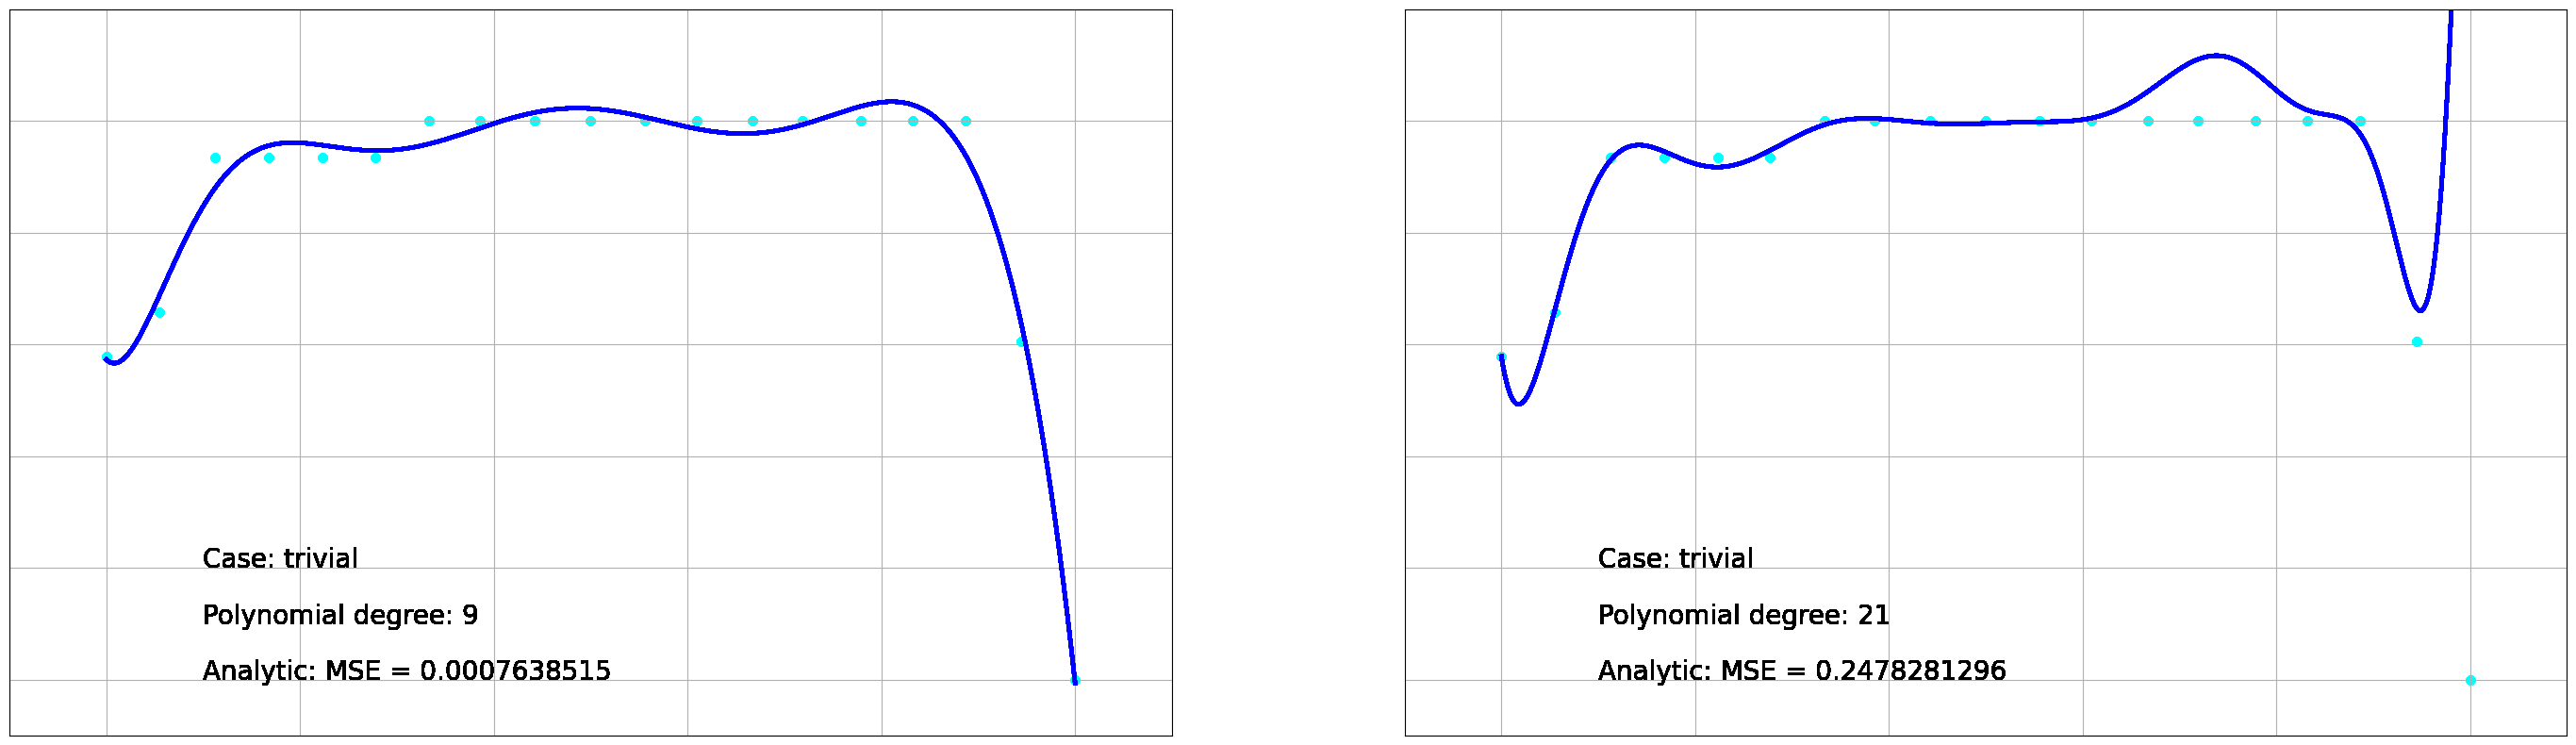

In [186]:
sklearn_trivial, [ax1, ax2] = plt.subplots(1, 2, figsize=(35, 10))
analytic_trivial, [bx1, bx2] = plt.subplots(1, 2, figsize=(35, 10))
sklearn_method(x, y, 9, ax1, 'trivial')
sklearn_method(x, y, 21, ax2, 'trivial')
analytic_method(x, y, 9, bx1, 'trivial')
analytic_method(x, y, 21, bx2, 'trivial')


Przypadek zbioru punktów w kluczowych momentach podróży ptaszka

sklearn_method: 0.0048590279s
sklearn_method: 0.0070680928s
analytic_method: 0.0043537807s
analytic_method: 0.0059214282s


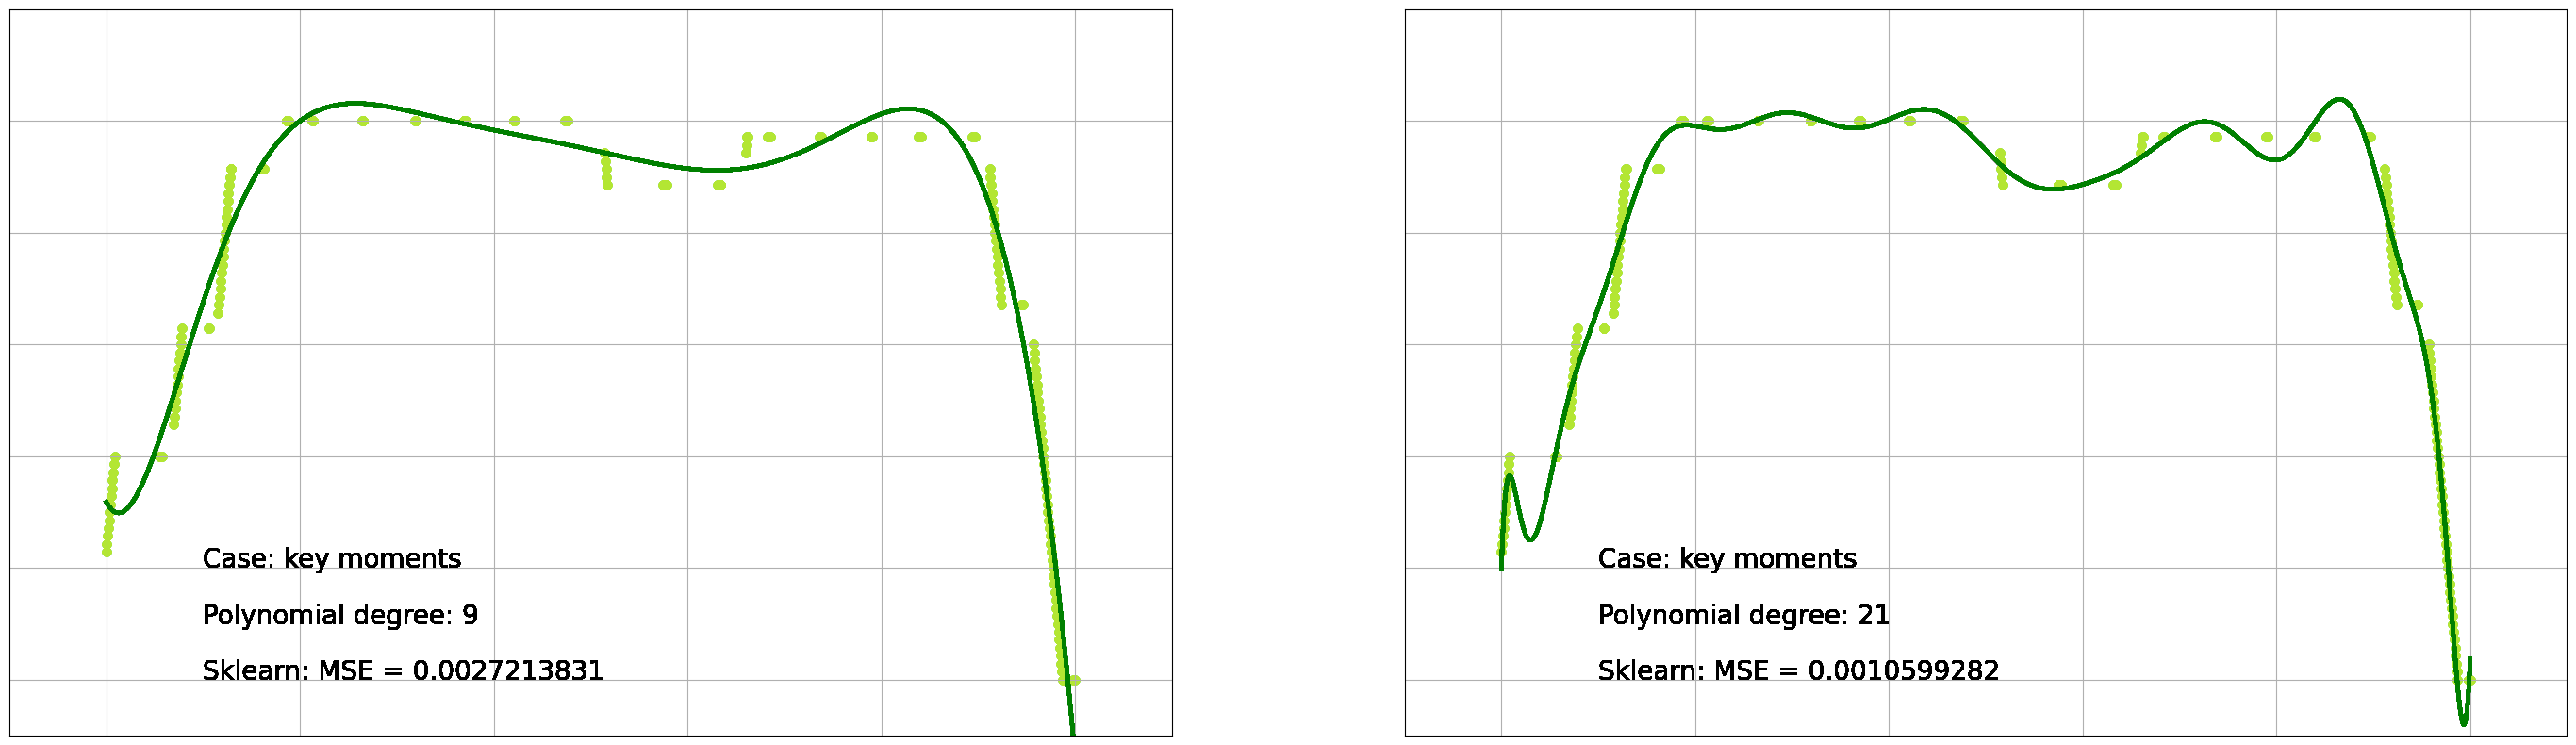

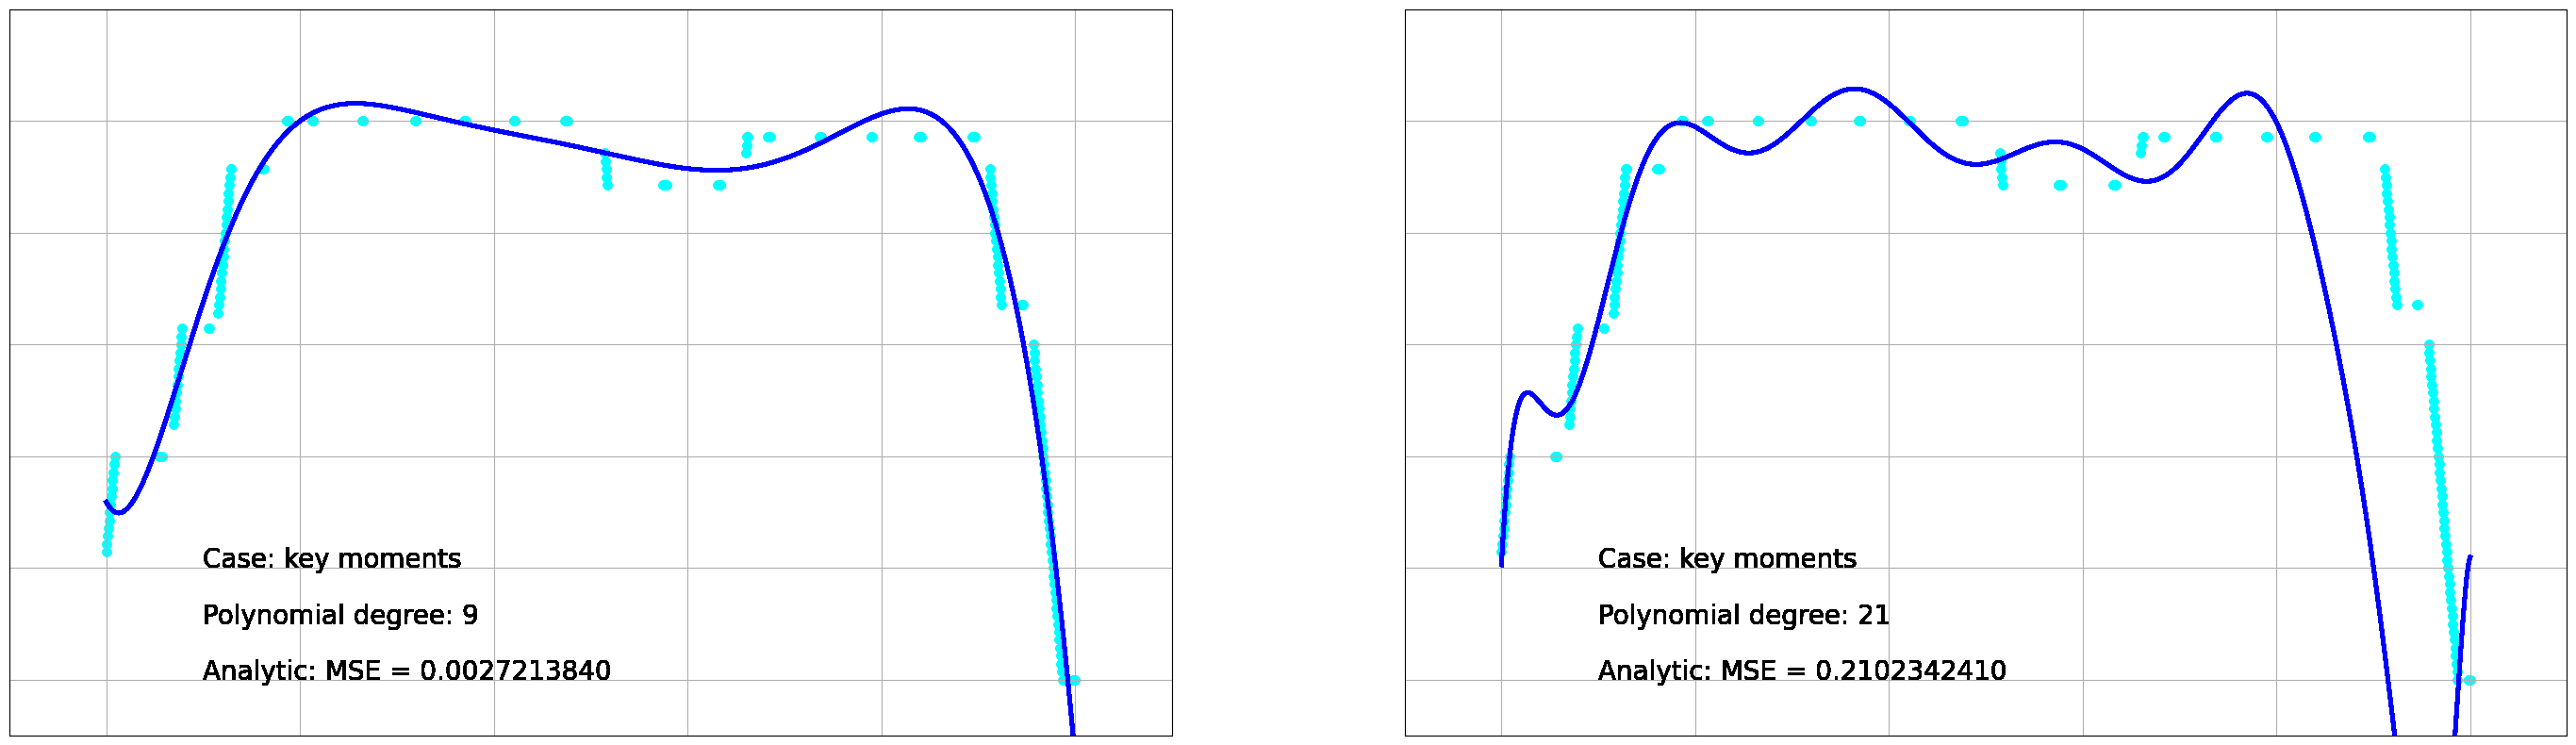

In [187]:
data = np.genfromtxt('flappy_bird_case2.csv', delimiter=',')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])
sklearn_key_moments, [ax3, ax4] = plt.subplots(1, 2, figsize=(35, 10))
analytic_key_moments, [bx3, bx4] = plt.subplots(1, 2, figsize=(35, 10))
sklearn_method(x, y, 9, ax3, 'key moments', 0.3)
sklearn_method(x, y, 21, ax4, 'key moments', 0.3)
analytic_method(x,y,9,bx3, 'key moments', 0.3)
analytic_method(x,y,21,bx4, 'key moments', 0.3)


Przypadek pełnej trasy

sklearn_method: 0.0064559817s
sklearn_method: 0.0119303536s
analytic_method: 0.0058205414s
analytic_method: 0.0081391931s


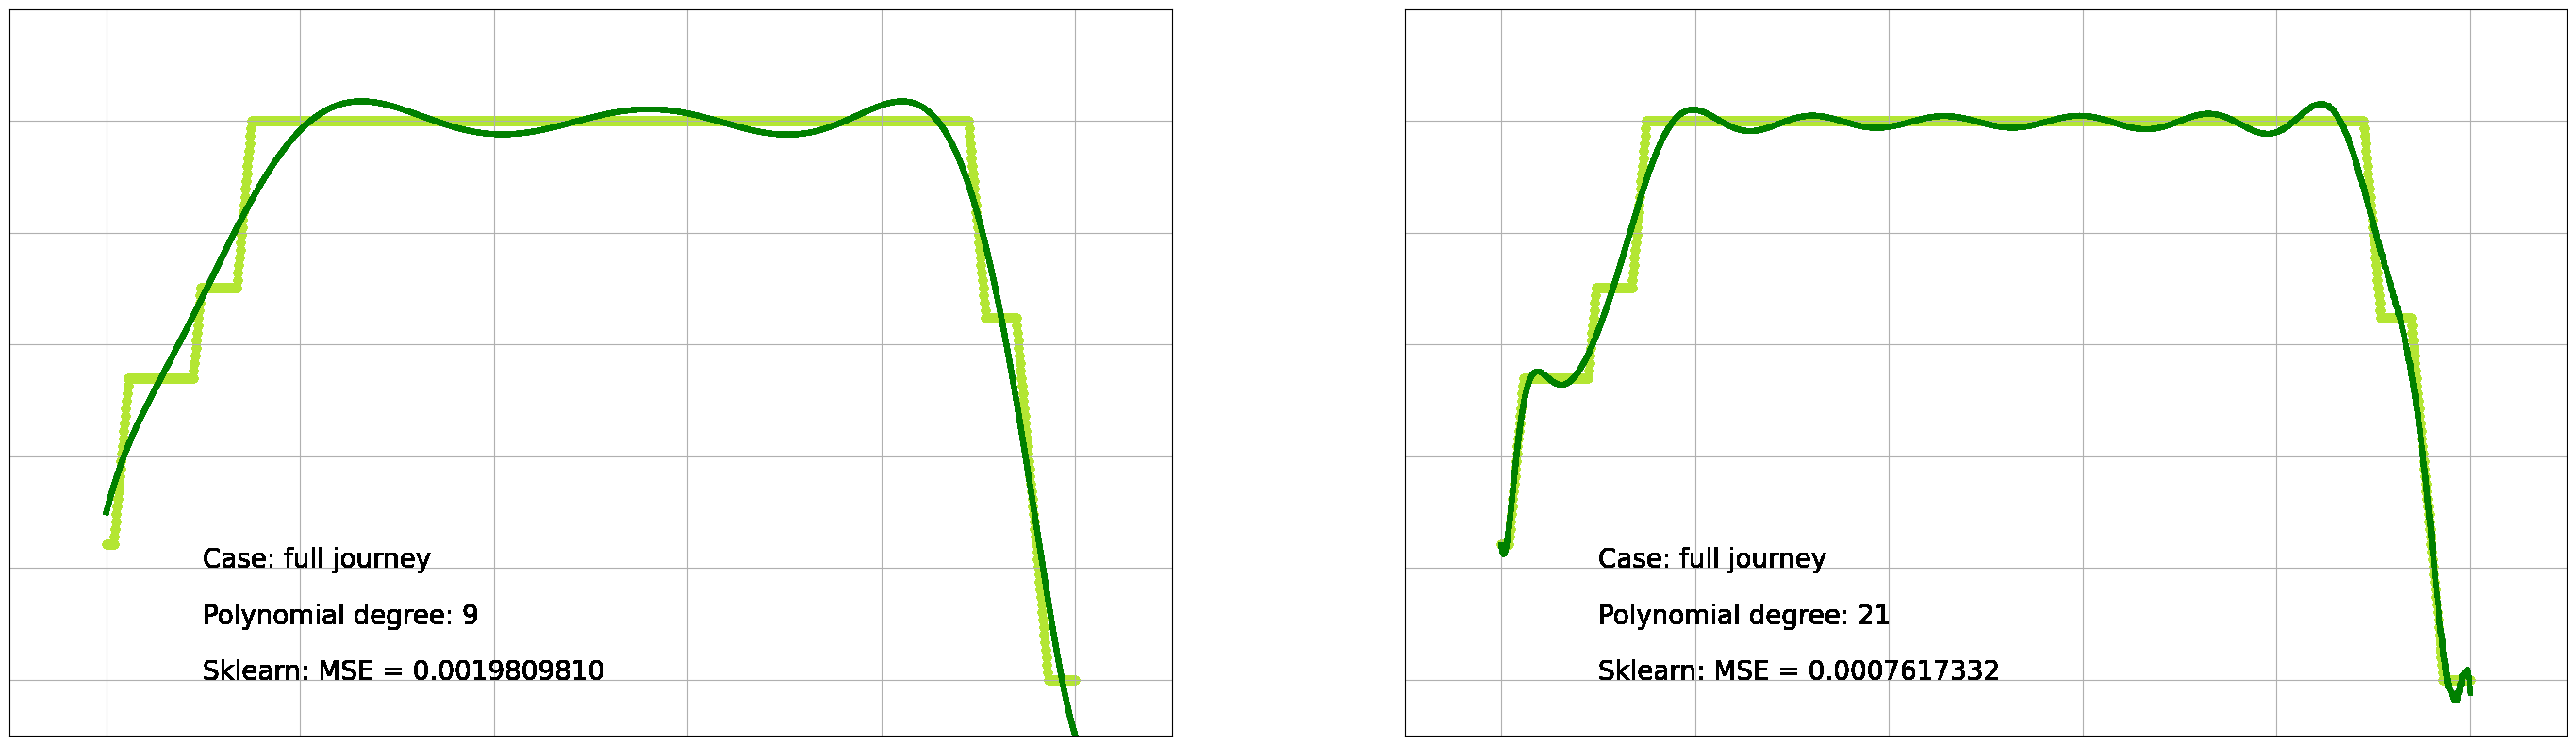

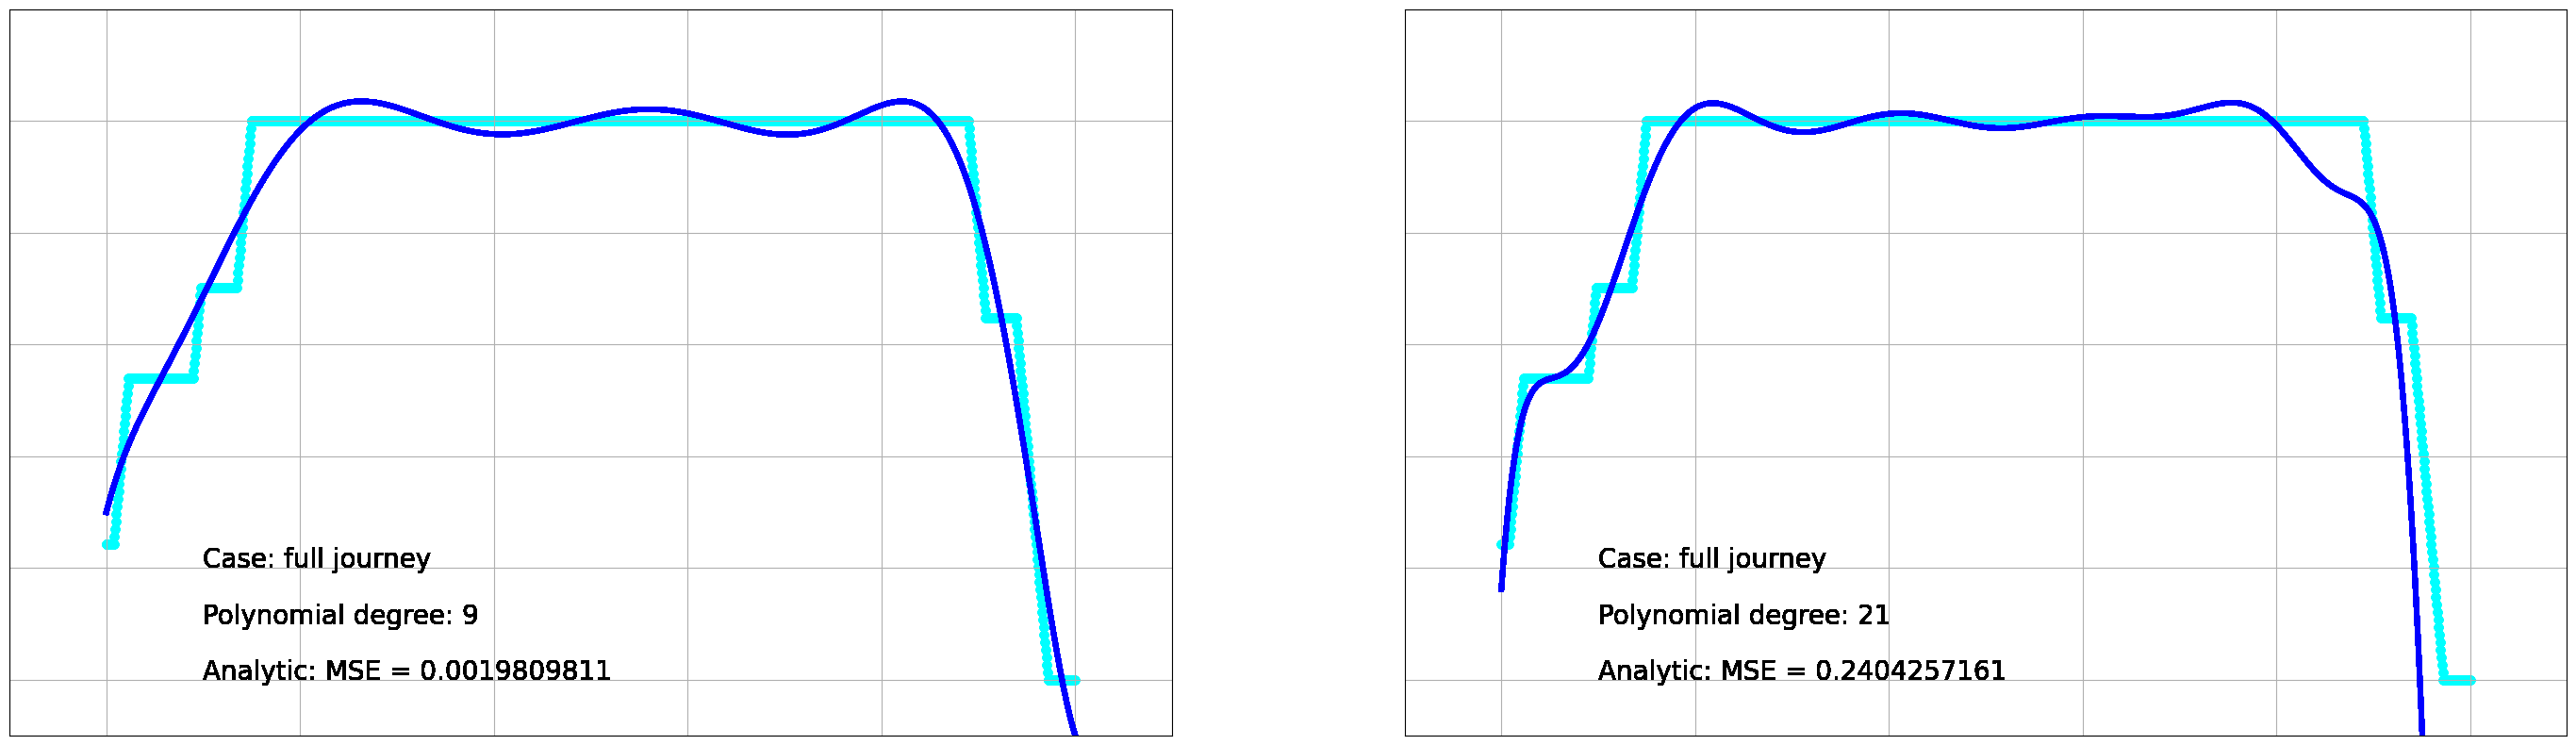

In [188]:
data = np.genfromtxt('flappy_bird_case3.csv', delimiter=',')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])
sklearn_full_journey, [ax5, ax6] = plt.subplots(1, 2, figsize=(35, 10))
analytic_full_journey, [bx5, bx6] = plt.subplots(1, 2, figsize=(35, 10))
sklearn_method(x, y, 9, ax5, 'full journey', 0.1, 4)
sklearn_method(x, y, 21, ax6, 'full journey', 0.1, 4)
analytic_method(x,y,9,bx5, 'full journey', 0.2,4)
analytic_method(x,y,21,bx6, 'full journey', 0.2, 4)



In [189]:
@timeit100
def analytic_Tichonowa_method(x, y, poly_degree, ax, case, lmbda = 0.1, alpha = 1, linewidth = 3):
    Xn = np.vander(x.reshape(-1,), N= poly_degree +1)
    theta_analytic = np.linalg.inv(Xn.T @ Xn + lmbda*np.eye(Xn.shape[1])) @ Xn.T @ y
    y_pred = ypred(x, poly_degree, theta_analytic)
    

    MSE = mean_squared_error(y, y_pred)

    X = np.array([i/1000 for i in range(0,1001)])
    Y = ypred(X, poly_degree, theta_analytic)


    ax.scatter(x, y, color='magenta', alpha = alpha)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.text(0.1,0,f'Analytic Tichonowa: MSE = {MSE:.10f}',fontsize=20)
    ax.text(0.1,0.1,f'Polynomial degree: {poly_degree}',fontsize=20)
    ax.text(0.1,0.2,f'Case: {case}',fontsize=20)
    ax.text(0.1,0.3,f'lambda = {lmbda}',fontsize=20)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.2)
    ax.plot(X, Y, color='purple', linewidth = linewidth )
    ax.grid(True)

In [190]:
@timeit100
def sklearn_method_ridge(x, y, poly_degree, ax, case, lmbda = 0.1, transparency = 1, linewidth = 3):
    poly_features = PolynomialFeatures(degree=poly_degree, include_bias=False)
    x_poly = poly_features.fit_transform(x.reshape(-1,1))

    model = Ridge(alpha=lmbda)
    model.fit(x_poly, y)
    y_pred = model.predict(x_poly)

    MSE = mean_squared_error(y, y_pred)

    X = np.array([[i / 1000] for i in range(1001)])  
    Y = model.predict(poly_features.transform(X)) 

    ax.scatter(x, y, color='magenta', alpha = transparency)
    ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
    ax.text(0.1,0,f'Sklearn_Ridge: MSE = {MSE:.10f}',fontsize=20)
    ax.text(0.1,0.1,f'Polynomial degree: {poly_degree}',fontsize=20)
    ax.text(0.1,0.2,f'Case: {case}',fontsize=20)
    ax.text(0.1,0.3,f'alpha = {lmbda}',fontsize=20)
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.2)
    ax.plot(X, Y, color='purple', linewidth = linewidth )
    ax.grid(True)


analytic_Tichonowa_method: 0.0049135470s
sklearn_method_ridge: 0.0056704450s
analytic_Tichonowa_method: 0.0070847702s
sklearn_method_ridge: 0.0069809222s
analytic_Tichonowa_method: 0.0064419127s
sklearn_method_ridge: 0.0073960733s


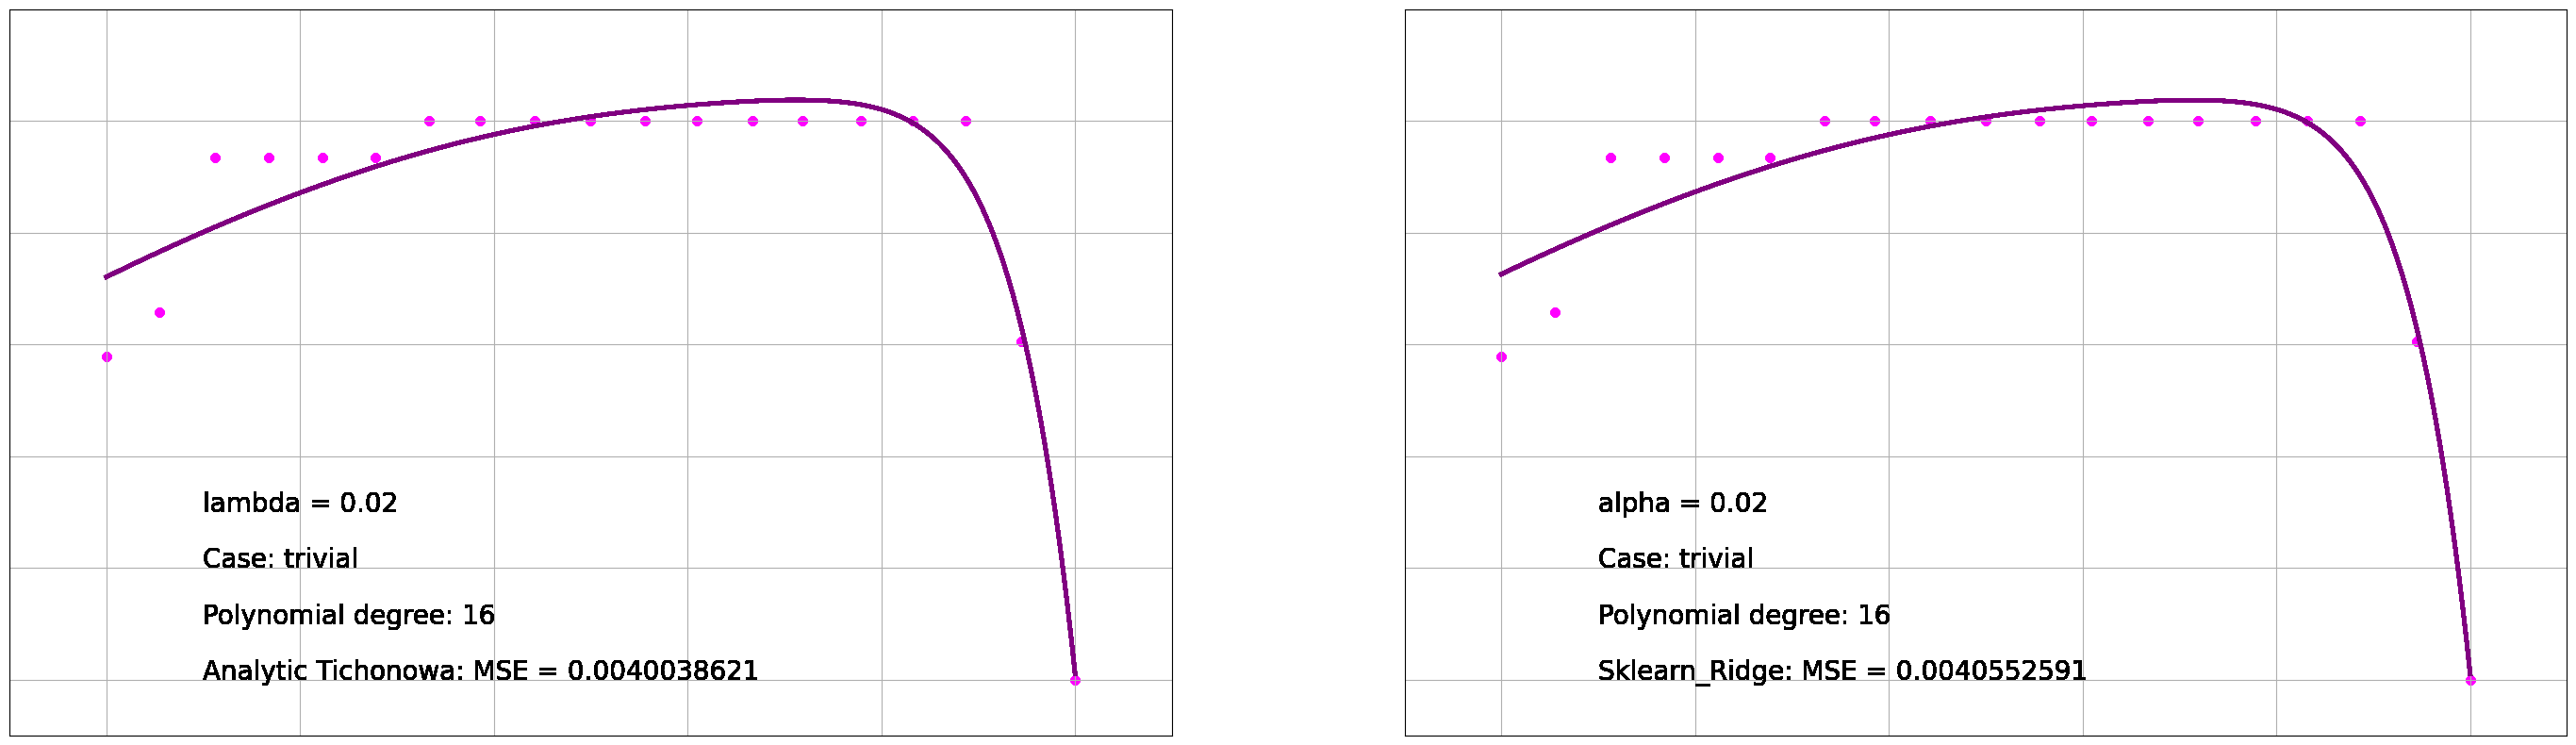

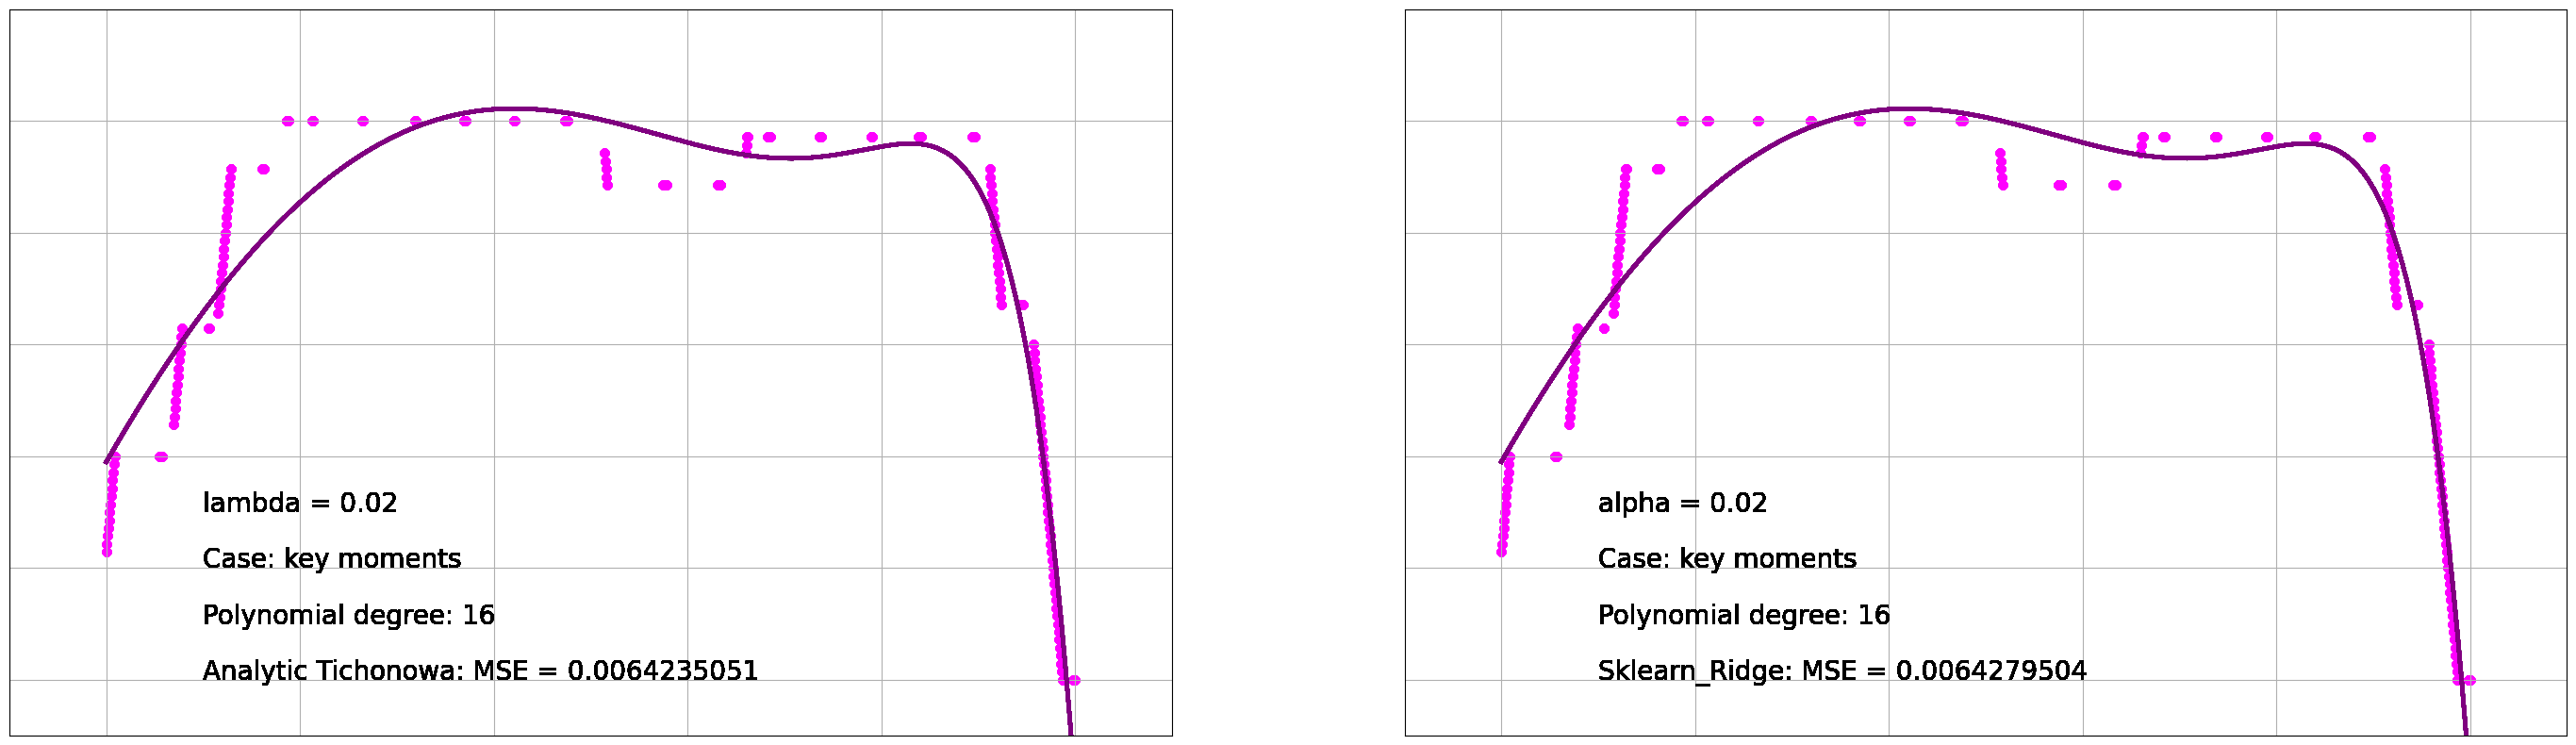

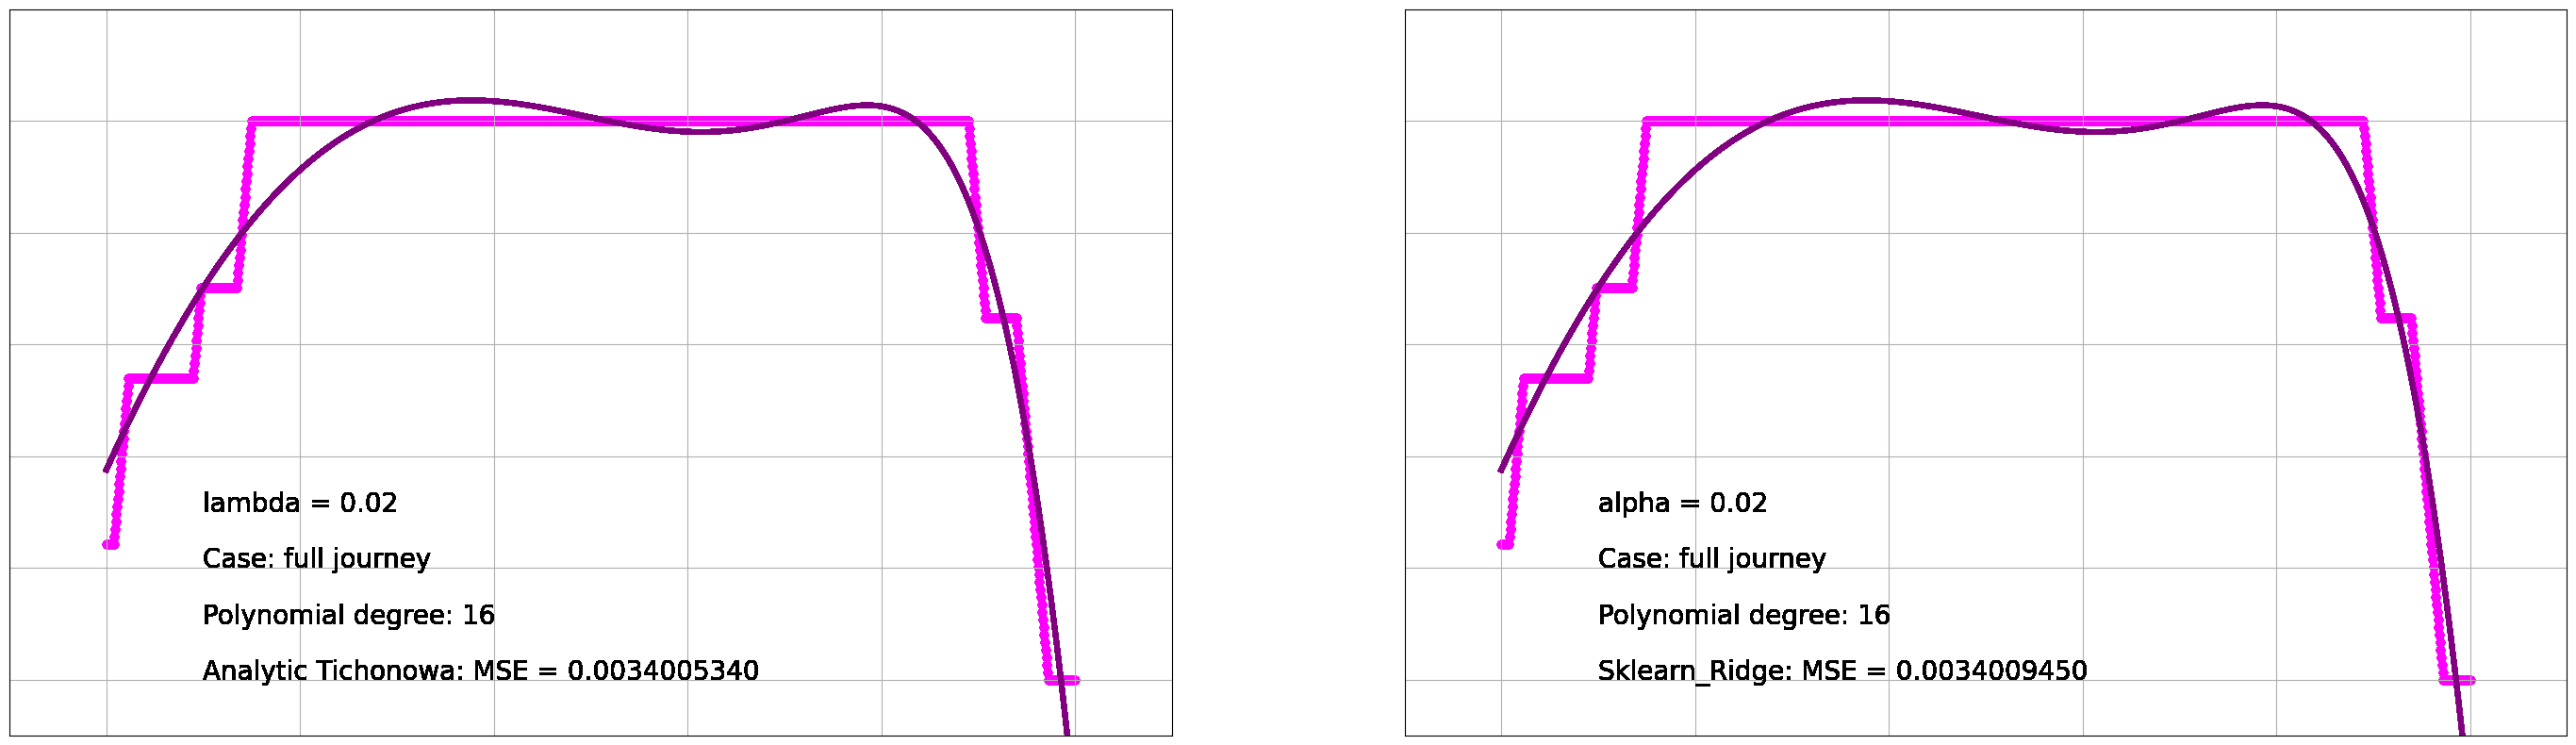

In [191]:
data = np.genfromtxt('flappy_bird_case1.csv', delimiter=',')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])


analytic_Tichonowa_full_journey, [tx1,tx2] = plt.subplots(1, 2, figsize=(35, 10))
analytic_Tichonowa_method(x,y,16,tx1, 'trivial', 0.02)
sklearn_method_ridge(x,y, 16, tx2, 'trivial', 0.02)
# analytic_Tichonowa_method(x,y,16,tx2, 'trivial', 0.01)


data = np.genfromtxt('flappy_bird_case2.csv', delimiter=',')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])

analytic_Tichonowa_full_journey, [tx3,tx4] = plt.subplots(1, 2, figsize=(35, 10))
analytic_Tichonowa_method(x,y,16,tx3, 'key moments', 0.02)
# analytic_Tichonowa_method(x,y,16,tx4, 'key moments', 0.01)
sklearn_method_ridge(x,y, 16, tx4, 'key moments', 0.02)


data = np.genfromtxt('flappy_bird_case3.csv', delimiter=',')
scaler = MinMaxScaler()
scaler.fit(data)
normalized = scaler.transform(data)

x = np.array([res[0] for res in normalized])
y = np.array([res[1] for res in normalized])

analytic_Tichonowa_full_journey, [tx5,tx6] = plt.subplots(1, 2, figsize=(35, 10))
analytic_Tichonowa_method(x,y,16,tx5, 'full journey', 0.02, 0.1, 4)
# analytic_Tichonowa_method(x,y,16,tx6, 'full journey', 0.01, 0.1, 4)
sklearn_method_ridge(x,y, 16, tx6, 'full journey', 0.02, 0.1, 4)
